### 分析泰坦尼克数据集，以下为待探索问题

#### 问题1：船上都包括哪些人？
#### 问题2：当灾难发生后，哪一类人求生能力更强？
#### 问题3：哪个港口存活率更高

### =======================================


## 数据导入

In [1]:
# 导入包
import pandas as pd
from pandas import Series,DataFrame
import numpy as np
import matplotlib as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

In [2]:
# 读入数据集，构造dataframe
df = pd.read_csv('titanic-data.csv')

In [3]:
# dataframe
# columns
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 查看 columns 值缺失情况
#### Age缺失接近20%，Cabin缺失严重，Embarked缺失两条，其他变量无缺失，总记录891条

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


## 观察可计数列的数据描述
#### columns的均值、众数、方差等基本统计量
#### Pclass值域[1,2,3]，Age最大为80

In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## 社会地位的分布 
#### Pclass 的条形图
#### 船上超过一半的乘客社会地位较低，社会地位高的人数略高于中产人数

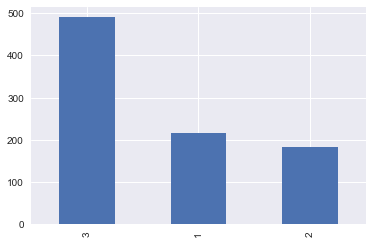

In [6]:
df['Pclass'].value_counts().plot(kind='bar')

##  年龄的分布
#### 删除年龄缺失值，画分布图
#### 接近20%的记录年龄缺失，舍弃掉该部分年龄值，观察分布情况
#### 船上人员年龄集中在25岁左右，青壮年居多

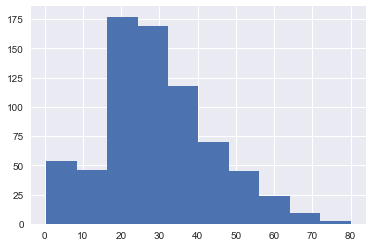

In [7]:
df['Age'].dropna().hist()

## 年龄的密度函数
#### 观察年龄的集中趋势

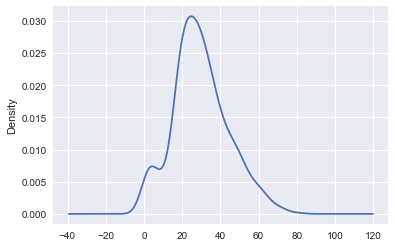

In [8]:
df['Age'].plot(kind='kde')

## Embarked 分布观察
#### dataframe中登船港口人数统计
#### 73%的乘客在南安普顿登船，远多于来自瑟堡和皇后镇的乘客。其中来自瑟堡的乘客数基本是来自皇后镇的一倍

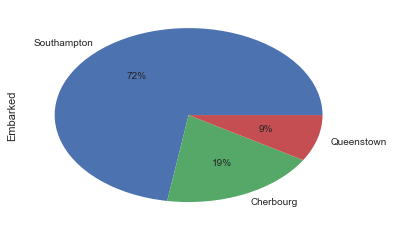

In [9]:
df['Embarked'].value_counts().plot(kind='pie', autopct='%.0f%%', labels=["Southampton","Cherbourg","Queenstown"])

## 登船港口的数据描述 
#### Embarked columns 的统计描述
#### 众数'S'，频次644，频率0.7244

In [10]:
df['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

##  登船港口缺失值处理
#### 从Embarked columns 的统计描述看出，所有乘客来自三个港口，其中来自S的乘客最多，有644位。另外，两条记录缺失
#### 缺失值处理思路：根据船上乘客的来源分布，缺失记录值为频率最高的记录值（即众数）可能性最大。因此，使用填充值'S'填充

In [11]:
# 缺失值替换
df['Embarked'] = df['Embarked'].fillna('S')
df['Embarked'].describe()

count     891
unique      3
top         S
freq      646
Name: Embarked, dtype: object

## 港口和获救的相关性 
#### 观察不同港口的获救情况，以Survived、Embarked分组计数，画条形图
#### 灾难发生后，来自南安普顿的幸存人数依然最多，但获救率最低，大约只有30%
#### 来自皇后镇和瑟堡的乘客获救率在50%左右

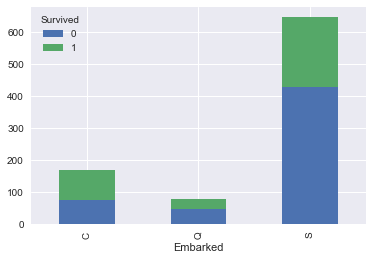

In [12]:
df.groupby(['Embarked', 'Survived']).size().unstack().plot(kind='bar', stacked=True)

## Survived VS Not Survived
#### 62%的乘客未能幸免于难，少数幸运儿获救

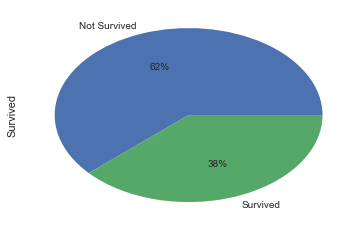

In [13]:
# Survived columns 
df['Survived'].value_counts().plot(kind='pie', autopct='%.0f%%', labels=['Not Survived', 'Survived'])

## 探索Survived与Pclass、Age的关系
#### 不同社会地位乘客获救率。显然，社会地位越高，获救率越高

#### 依Pclass分组，计算每组中Survived均值（存活率），画条形图

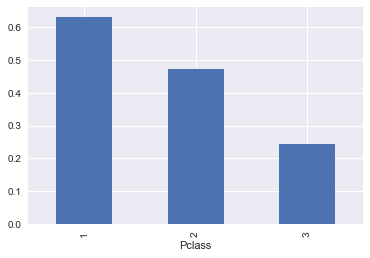

In [14]:
df.groupby('Pclass')['Survived'].mean().plot(kind='bar')

####  分组，计数，重塑，画不同社会地位下获救与否的累计图

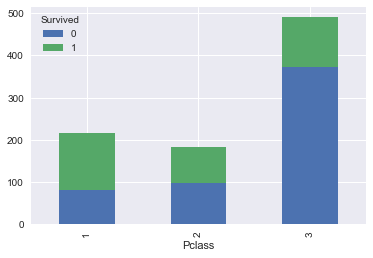

In [15]:
df.groupby(['Pclass', 'Survived'])['PassengerId'].count().unstack().plot(kind='bar', stacked=True)

#### 年龄属于连续变量，按照10位一组，分8组，最大年龄为80岁，将Age转为分类变量，存入Age_group
#### 根据Age_group分组计算存活率，可以看出，小于10岁的乘客获救率最高，接近60%

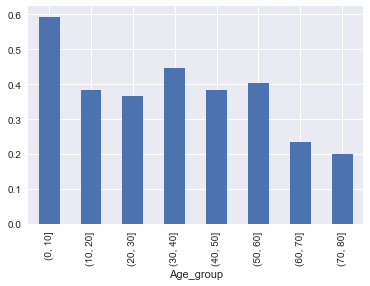

In [16]:
bins = np.arange(0,90,10)
df['Age_group'] = pd.cut(df['Age'], bins)
df.groupby(['Age_group'])['Survived'].mean().plot(kind='bar')

####  按照Age_group、Survived分组，画累计条形图，观察同一Age_group中的幸存比率
####  直观看到，小于10岁的乘客获救率最高，且超过50%

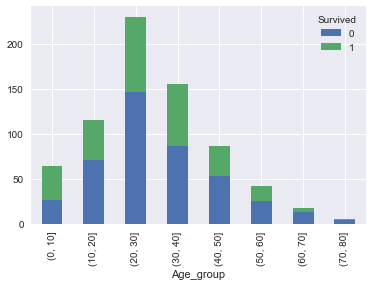

In [17]:
df.groupby(['Age_group', 'Survived'])['PassengerId'].count().unstack().plot(kind='bar', stacked=True)

### 结论

#### 数据总量891条，是大样本数据，并不是全部的数据。分析建立于样本数据基础之上，视样本数据为总体，采用统计分析方法探索数据，加工信息，得出结论。由于计算统计量过程有信息丢失，且并没有严格的假设检验，因此结论在总体上的适应性有待进一步验证。
#### 1、船上社会地位低的人居多，青壮年居多，人均有0.9个亲人。
#### 2、灾难发生后，社会地位低的人群获救率更低，小孩子获救率更高。可以看出，人们优先救助小孩，其次，社会地位高的人在灾难面前有更强的自我求生能力。
#### 3、灾难发生前，船上多数人来自港口Southampton。灾难发生后，来自港口Cherbourg的存活率明显高于50%，其他两个港口的存活率30%左右，且港口Southampton的存活人数依然远远多于其他港口。